In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt 

In [45]:
# Import in fly data. If you have a .csv or .txt you can substitude
# NOTE: You should rename 'lat', 'lon' in your data or rename it in this notebook.
# fly_df = pd.read_csv(<path_to_data.csv>)
fly_df = pd.DataFrame({'fly_id':[1,2], 'lat': [45,75], 'lon':[-110,-100]})

In [17]:
# Read in climate classification
climate_gdf = gpd.read_file('data/c1976_2000_0/c1976_2000.shp')

In [61]:
# Read in csv to translate codes to climate types
climate_translate = pd.read_csv('data/translation.csv')


In [29]:
# Combine geodataframe of climate classifcation with climate translation coddes
climate_gdf = climate_gdf.merge(climate_translate, on ='GRIDCODE',how='left')

,ID,GRIDCODE,geometry,classification
0,1,62,"POLYGON ((-37.50000 83.50000, -38.00000 83.500...",ET
1,2,62,"POLYGON ((-29.50000 83.50000, -37.00000 83.500...",ET
2,3,62,"POLYGON ((-46.00000 83.00000, -46.00000 83.500...",ET
3,4,62,"POLYGON ((-42.50000 83.50000, -39.50000 83.500...",ET
4,5,61,"POLYGON ((55.50000 81.00000, 55.50000 81.50000...",EF
...,...,...,...,...
2254,2255,61,"POLYGON ((-59.50000 -73.00000, -59.00000 -73.0...",EF
2255,2256,61,"POLYGON ((168.50000 -76.50000, 168.00000 -76.5...",EF
2256,2257,61,"POLYGON ((-66.00000 -77.00000, -66.50000 -77.0...",EF
2257,2258,61,"POLYGON ((-159.00000 -80.00000, -164.00000 -80...",EF


In [46]:
# Convert latitude and longitude points to geodataframe
# Note: this assumes your latitude is named 'lat' etc.
fly_gdf = gpd.GeoDataFrame(
    fly_df, geometry=gpd.points_from_xy(fly_df.lon, fly_df.lat), crs="EPSG:4004"
)

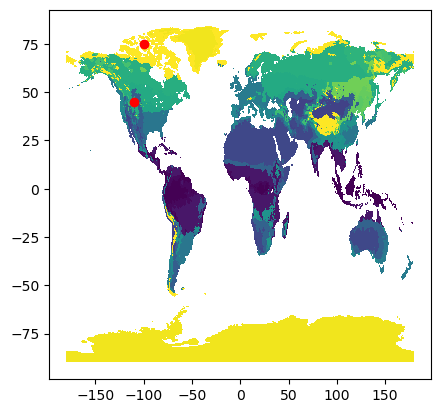

In [63]:

ax = climate_gdf.plot(column='GRIDCODE')

fly_gdf.plot(ax=ax, color="red")

plt.show()



In [52]:
# Preforms a spatial join to extract points of fly locations to each climate zone
join_df = climate_gdf.sjoin(fly_gdf, how="left")
join_df = join_df[~join_df['fly_id'].isnull()]


In [53]:
join_df[['fly_id','GRIDCODE']]

,fly_id,GRIDCODE
34,2.0,62
684,1.0,43


In [ ]:
# You can save this with .to_csv
# join_df.to_csv(<output_file_name.csv>)